In [37]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
import qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer

# import basic plot tools
from qiskit.visualization import plot_histogram

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-02-09 22:44:35,257: Credentials are already in use. The existing account in the session will be replaced.


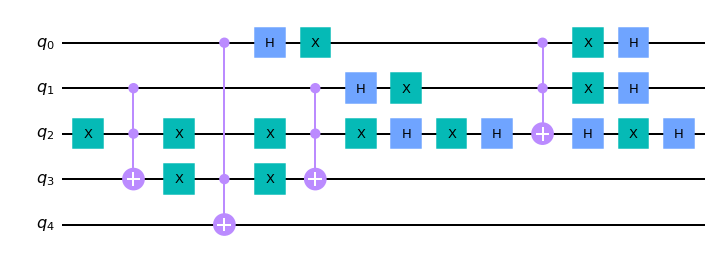

In [38]:
def grover_circuit():
    """Circuito anterior com 3/8 soluções"""
     # Do circuit
    circnew = QuantumCircuit(5)
    #Oracle
    circnew.x(2)
    circnew.ccx(1,2,3)
    circnew.x(2)
    circnew.x(3)
    circnew.ccx(0,3,4)
    circnew.x(3)
    circnew.x(2)
    circnew.ccx(1,2,3)
    circnew.x(2)

    #Diffuser

    for qubit in range(3) :
        circnew.h(qubit)

    for qubit in range(3) :
        circnew.x(qubit)

    circnew.h(2)

    circnew.ccx(0,1,2)

    circnew.h(2)

    for qubit in range(3) :
        circnew.x(qubit)

    for qubit in range(3) :
        circnew.h(qubit)

    return circnew
circ=grover_circuit()
circ.draw()

In [39]:
grover = grover_circuit().to_gate()
grover.label = "Grover"
cgrover = grover.control(1)

In [41]:
def qft_inv(n):
    
    circuit = QuantumCircuit(n)

    def qft_dg(circuit,n):
          
        for j in range(0,n,1):
           
            for i in range(0,j,1):
                circuit.cp(-(np.pi)/2**(j-i),i, j)
            circuit.h(j)
                
    
    qft_dg(circuit,n)

    return circuit


In [46]:
x=qft_inv(10)
#x.draw()

In [47]:

qft_inverso=qft_inv(10).to_gate()
qft_inverso.label = "QFT†"


In [54]:

t = 10 
n = 5 
qc = QuantumCircuit(n+t, t) 

qc.x(14)
qc.h(14)

for qubit in range(t+n-2):
    qc.h(qubit)

iterations = t-1
for qubit in range(t):
    for i in range(2**iterations):
        qc.append(cgrover, [qubit] + [*range(t, n+t)])
    iterations =iterations -1
    

qc.append(qft_inverso, range(t))


qc.measure(range(t), range(t))



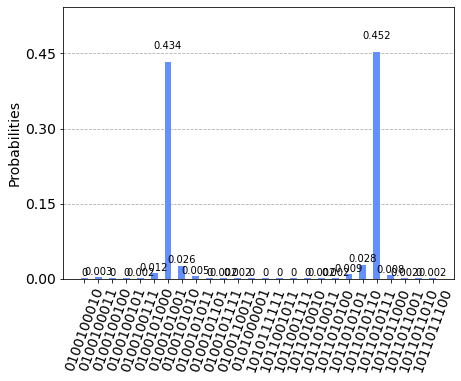

In [55]:
# Execute and see results
aer_sim = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_sim)
qobj = assemble(transpiled_qc)
job = aer_sim.run(qobj)
hist = job.result().get_counts()
plot_histogram(hist)

In [56]:
measured_str = max(hist, key=hist.get)
print(measured_str)

1011010111


In [57]:
measured_int =int(measured_str,2)
print("Register Output = %i" % measured_int)

Register Output = 727


In [52]:
def calculate_M(measured_int, t, n):
    """For Processing Output of Quantum Counting"""
    # Calculate Theta
    theta = (measured_int/(2**t))*math.pi*2
    print("Theta = %.5f" % theta)
    # Calculate No. of Solutions
    N = 2**n
    M = N * (math.sin(theta/2)**2)
    #print("M:",M)
    print("No. of Solutions = %.1f" % (N-M))
    # Calculate Upper Error Bound
    m = t - 1 #Will be less than this (out of scope) 
    err = (math.sqrt(2*M*N) + N/(2**(m+1)))*(2**(-m))
    print("Error < %.2f" % err)

In [53]:

calculate_M(measured_int,t,3)

Theta = 1.82237
No. of Solutions = 3.0
Error < 0.02
